<a href="https://colab.research.google.com/github/BehzadBarati/AnimeFaceNotebooks/blob/master/Waterbody_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

####Summary
This Python notebook is for doing explanatory data analysis (EDA) on dataset of 3 waterbodies in Italia. This work is for final assignment of programming 1 course.
___
####Research question
How does Indep var x influence dependent variable Y?

Rainfall vs Flow of Water spring: We want to see the effects of rainfall on flow on 3 water sprint called: Amiata, Lupa and Madonna in Italy.
___
####Data
Data is prvided by  is composed of 3 waterbody datasets:
* Amiata (abbreviated as amia)
* Lupa (lupa)
* Madonna di Canneto (abbreviated as mado))
___
####Description
* I run this notebook on Google colab platform. for running on local machine, 'mypath' directory should be modified.
* As each waterbody is different from the other, the related features as well are different from each other. So, if for instance I consider a water spring we notice that its features are different from the lake’s one. This is correct and reflects the behavior and characteristics of each waterbody


A Water spring is a point at which water flows from an aquifer to the Earth's surface. It is a component of the hydrosphere.

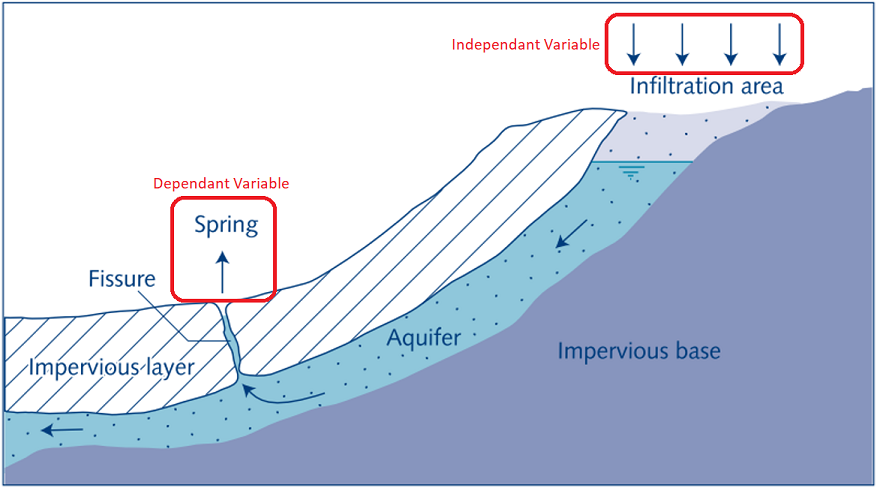

#Import libraries

In [1]:
from google.colab import drive
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import folium
import seaborn as sns
from geopy.geocoders import Nominatim

#Load data

In [2]:
# Mount google drive to colab notebook

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
# I create a list of file names in our desired folder

mypath = "gdrive/MyDrive/Projects/Acea-water/Data"
filenames = os.listdir(mypath)
print (filenames)

['Water_Spring_Lupa.csv', 'Water_Spring_Madonna_di_Canneto.csv', 'Water_Spring_Amiata.csv']


In [4]:
# Our 3 datasets will be read and store in variables same as their names.

for file in filenames:
    vars()[file.split('.')[0]] = pd.read_csv(os.path.join(mypath, file))

In [5]:
print(Water_Spring_Lupa.isnull().sum(axis = 0))
Water_Spring_Lupa.head()

Date                0
Rainfall_Terni      0
Flow_Rate_Lupa    382
dtype: int64


,Date,Rainfall_Terni,Flow_Rate_Lupa
0,01/01/2009,2.797,NaN
1,02/01/2009,2.797,NaN
2,03/01/2009,2.797,NaN
3,04/01/2009,2.797,NaN
4,05/01/2009,2.797,NaN


In [6]:
print(Water_Spring_Madonna_di_Canneto.isnull().sum(axis = 0))
Water_Spring_Madonna_di_Canneto.head()

Date                               9
Rainfall_Settefrati              556
Temperature_Settefrati           556
Flow_Rate_Madonna_di_Canneto    1726
dtype: int64


,Date,Rainfall_Settefrati,Temperature_Settefrati,Flow_Rate_Madonna_di_Canneto
0,01/01/2012,0.0,5.25,NaN
1,02/01/2012,5.6,6.65,NaN
2,03/01/2012,10.0,8.85,NaN
3,04/01/2012,0.0,6.75,NaN
4,05/01/2012,1.0,5.55,NaN


In [7]:
print(Water_Spring_Amiata.isnull().sum(axis = 0))
Water_Spring_Amiata.head()

Date                                        0
Rainfall_Castel_del_Piano                1196
Rainfall_Abbadia_S_Salvatore             3901
Rainfall_S_Fiora                         4854
Rainfall_Laghetto_Verde                  4622
Rainfall_Vetta_Amiata                    5275
Depth_to_Groundwater_S_Fiora_8           3918
Depth_to_Groundwater_S_Fiora_11bis       3893
Depth_to_Groundwater_David_Lazzaretti    4245
Temperature_Abbadia_S_Salvatore          3904
Temperature_S_Fiora                         0
Temperature_Laghetto_Verde               3883
Flow_Rate_Bugnano                        5479
Flow_Rate_Arbure                         5479
Flow_Rate_Ermicciolo                     5479
Flow_Rate_Galleria_Alta                  5479
dtype: int64


,Date,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde,Flow_Rate_Bugnano,Flow_Rate_Arbure,Flow_Rate_Ermicciolo,Flow_Rate_Galleria_Alta
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.15,NaN,NaN,NaN,NaN,NaN
1,02/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.55,NaN,NaN,NaN,NaN,NaN
2,03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.70,NaN,NaN,NaN,NaN,NaN
3,04/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN
4,05/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.60,NaN,NaN,NaN,NaN,NaN


##Merge dataframes and renaming columns

In [8]:
# To have a cleaner code, I prefer to remove unnecessary columns. I also keep orginal dataframes as they are.
lupa = Water_Spring_Lupa[['Date', 'Rainfall_Terni', 'Flow_Rate_Lupa']]
madonna = Water_Spring_Madonna_di_Canneto[['Date', 'Rainfall_Settefrati', 'Flow_Rate_Madonna_di_Canneto']]
amiata = Water_Spring_Amiata[['Date', 'Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore', 'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata', 'Flow_Rate_Bugnano', 'Flow_Rate_Arbure', 'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']]

# Creat one main dataframe to contain all data
waterdf = lupa.merge(madonna, on='Date', how='outer')
waterdf = waterdf.merge(amiata, on='Date', how='outer')
waterdf = waterdf.sort_values(by='Date').reset_index(drop=True)

#As names are long, we should set abbreviation for them as follow
dict_name = {'Rainfall_Terni': 'lupa_rain_1', 'Flow_Rate_Lupa': 'lupa_flow_1',
             'Rainfall_Settefrati': 'mado_rain_1', 'Flow_Rate_Madonna_di_Canneto': 'mado_flow_1',
             'Rainfall_Castel_del_Piano': 'amia_rain_1', 'Rainfall_Abbadia_S_Salvatore': 'amia_rain_2', 'Rainfall_S_Fiora': 'amia_rain_3', 'Rainfall_Laghetto_Verde': 'amia_rain_4', 'Rainfall_Vetta_Amiata': 'amia_rain_5',
             'Flow_Rate_Bugnano': 'amia_flow_1', 'Flow_Rate_Arbure': 'amia_flow_2', 'Flow_Rate_Ermicciolo': 'amia_flow_3', 'Flow_Rate_Galleria_Alta': 'amia_flow_4'
             }
waterdf.rename(columns=dict_name, inplace=True)

In [9]:
print(waterdf.isnull().sum(axis = 0))
waterdf.head()

Date              9
lupa_rain_1    3297
lupa_flow_1    3679
mado_rain_1    4939
mado_flow_1    6109
amia_rain_1    1205
amia_rain_2    3910
amia_rain_3    4863
amia_rain_4    4631
amia_rain_5    5284
amia_flow_1    5488
amia_flow_2    5488
amia_flow_3    5488
amia_flow_4    5488
dtype: int64


,Date,lupa_rain_1,lupa_flow_1,mado_rain_1,mado_flow_1,amia_rain_1,amia_rain_2,amia_rain_3,amia_rain_4,amia_rain_5,amia_flow_1,amia_flow_2,amia_flow_3,amia_flow_4
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/2003,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Data cleaning

In [10]:
# rows without data are not useful, so I remove them.

waterdf = waterdf[waterdf['Date'].notnull()]

It seems our datasets have alot of missing values. I try to visualize missing values in a good manner

In [11]:
# Retrieving the dataframe columns
columns = waterdf.columns.tolist()

print('Number of variables: ',len(columns))
print('Variables type:')
print(waterdf.dtypes)

# Descriptive statistics summary
waterdf.describe()

Number of variables:  14
Variables type:
Date            object
lupa_rain_1    float64
lupa_flow_1    float64
mado_rain_1    float64
mado_flow_1    float64
amia_rain_1    float64
amia_rain_2    float64
amia_rain_3    float64
amia_rain_4    float64
amia_rain_5    float64
amia_flow_1    float64
amia_flow_2    float64
amia_flow_3    float64
amia_flow_4    float64
dtype: object


,lupa_rain_1,lupa_flow_1,mado_rain_1,mado_flow_1,amia_rain_1,amia_rain_2,amia_rain_3,amia_rain_4,amia_rain_5,amia_flow_1,amia_flow_2,amia_flow_3,amia_flow_4
count,4199.000000,3817.000000,2557.000000,1387.000000,6291.000000,3586.000000,2633.000000,2865.000000,2212.000000,2008.000000,2008.000000,2008.000000,2008.000000
mean,2.466355,-97.712916,4.252444,263.160470,2.624034,3.784830,4.095784,4.332845,2.866456,-0.259413,-2.009348,-4.507117,-20.972385
std,2.041837,15.026314,10.242426,32.073660,7.997019,11.358671,11.861017,12.143496,7.471131,0.130209,1.062751,1.465277,2.034663
min,0.000000,-182.310000,0.000000,187.753182,0.000000,0.000000,0.000000,0.000000,0.000000,-0.385529,-3.042149,-6.469258,-26.089554
25%,1.402000,-105.760000,0.000000,224.659081,0.000000,0.000000,0.000000,0.000000,0.000000,-0.348533,-2.785148,-5.422521,-22.485956
50%,2.142000,-96.590000,0.000000,277.045159,0.000000,0.000000,0.000000,0.000000,0.000000,-0.319199,-2.491041,-4.862256,-20.718974
75%,3.165000,-87.220000,3.600000,290.165584,0.600000,1.400000,1.800000,1.800000,1.400000,-0.219417,-1.695151,-3.872881,-19.241000
max,76.000000,0.000000,140.800000,300.160983,149.600000,228.500000,220.000000,165.200000,79.200000,0.000000,0.000000,0.000000,-17.098023


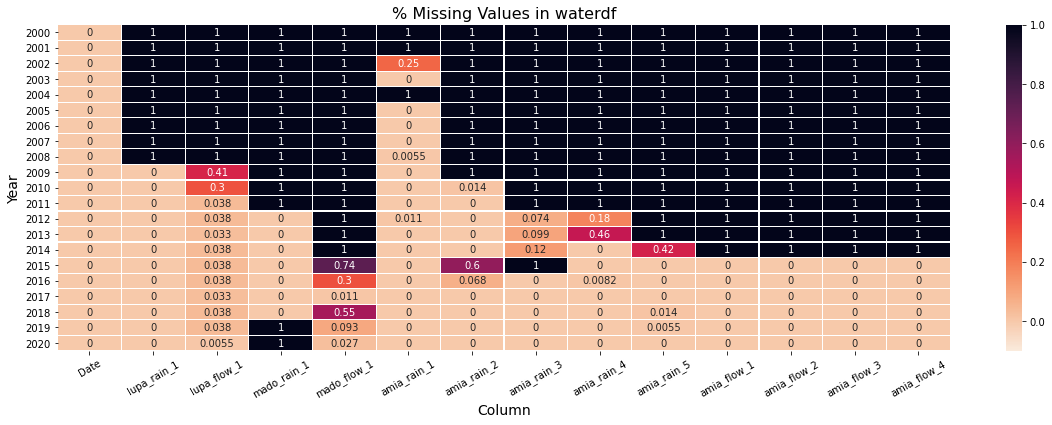

In [12]:
#https://www.kaggle.com/iamleonie/eda-quenching-the-thirst-for-insights
waterdf['Date'] = pd.to_datetime(waterdf['Date'], format = '%d/%m/%Y')
waterdf['year'] = waterdf['Date'].dt.year.astype(int)

temp = waterdf[[c for c in waterdf.columns if c != 'year']].isna().astype(int)
temp['year'] = waterdf.year
temp = temp.groupby('year').mean()

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,6))

sns.heatmap(temp,  
            cmap = 'rocket_r', vmin=-0.1, vmax=1, ax=ax, annot = True, linewidth=0.2)
plt.xticks(rotation=30)
ax.set_ylabel('Year', fontsize=14)
ax.set_xlabel('Column', fontsize=14)
ax.set_title('% Missing Values in waterdf', fontsize=16)

plt.show()

In [13]:
# As we can see there are many NAN values before 2014, I prefer to only keep data after 2014.

waterdf = waterdf[waterdf['year'] > 2014]

##Distribution of data in our dataframes

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 0.98, 'Distribution of Data')

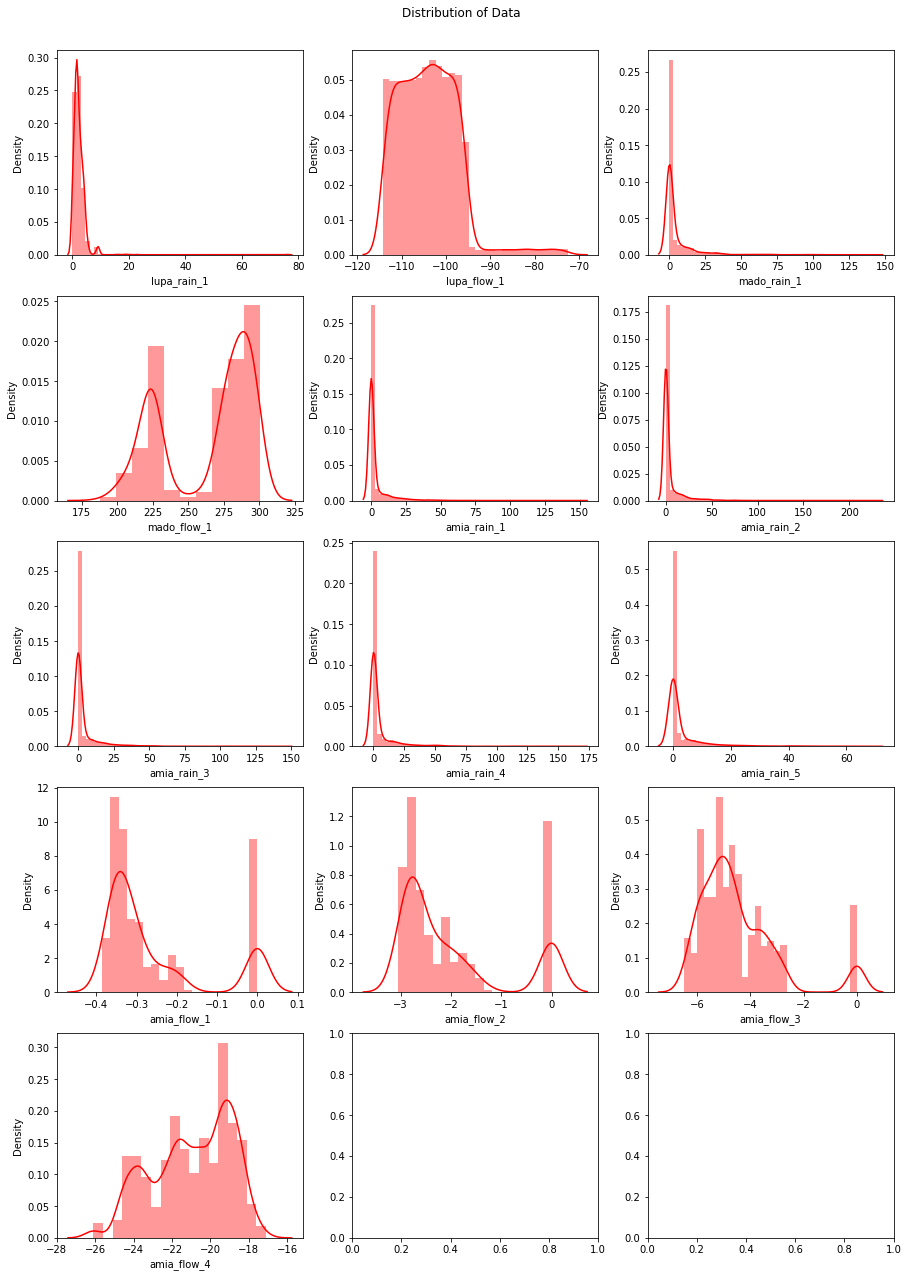

In [14]:
# Histogram to understand the data distribution of some relevant features

# Number of columns
ncols = 3
# Number of rows
import math
nrows = math.ceil((len(columns) -1) / 3)
fig, axs = plt.subplots(ncols = ncols, nrows = nrows, figsize= (15, 20))
grid = []
for j in range(nrows):
    for h in range(ncols):
        grid.append([j,h])
[sns.distplot(waterdf[columns[i+1]], ax=axs[grid[i][0], grid[i][1]], color= 'red') for i in range(0,len(columns)-1)]
fig.subplots_adjust(top=0.95)
fig.suptitle('Distribution of Data')

# Correlation between data

##with droping NAN values

In this approach we drop NAN values and then try to understand correlation between data

In [15]:
#Drop na values in dataframe
waterdf_drna = waterdf.dropna()

Correlation between data after dropping NAN


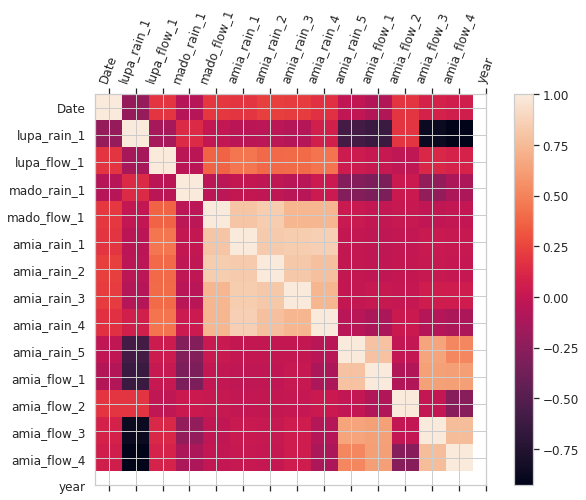

In [16]:
#plot correlation diagram

sns.set(style='whitegrid',context='notebook')
f = plt.figure(figsize=(10, 7))
plt.matshow(waterdf_drna.corr(), fignum=f.number)
plt.xticks(range(waterdf_drna.shape[1]), waterdf_drna.columns, fontsize=12, rotation=70)
plt.yticks(range(waterdf_drna.shape[1]), waterdf_drna.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
print('Correlation between data after dropping NAN')

###More detailed correlation patterns in data

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


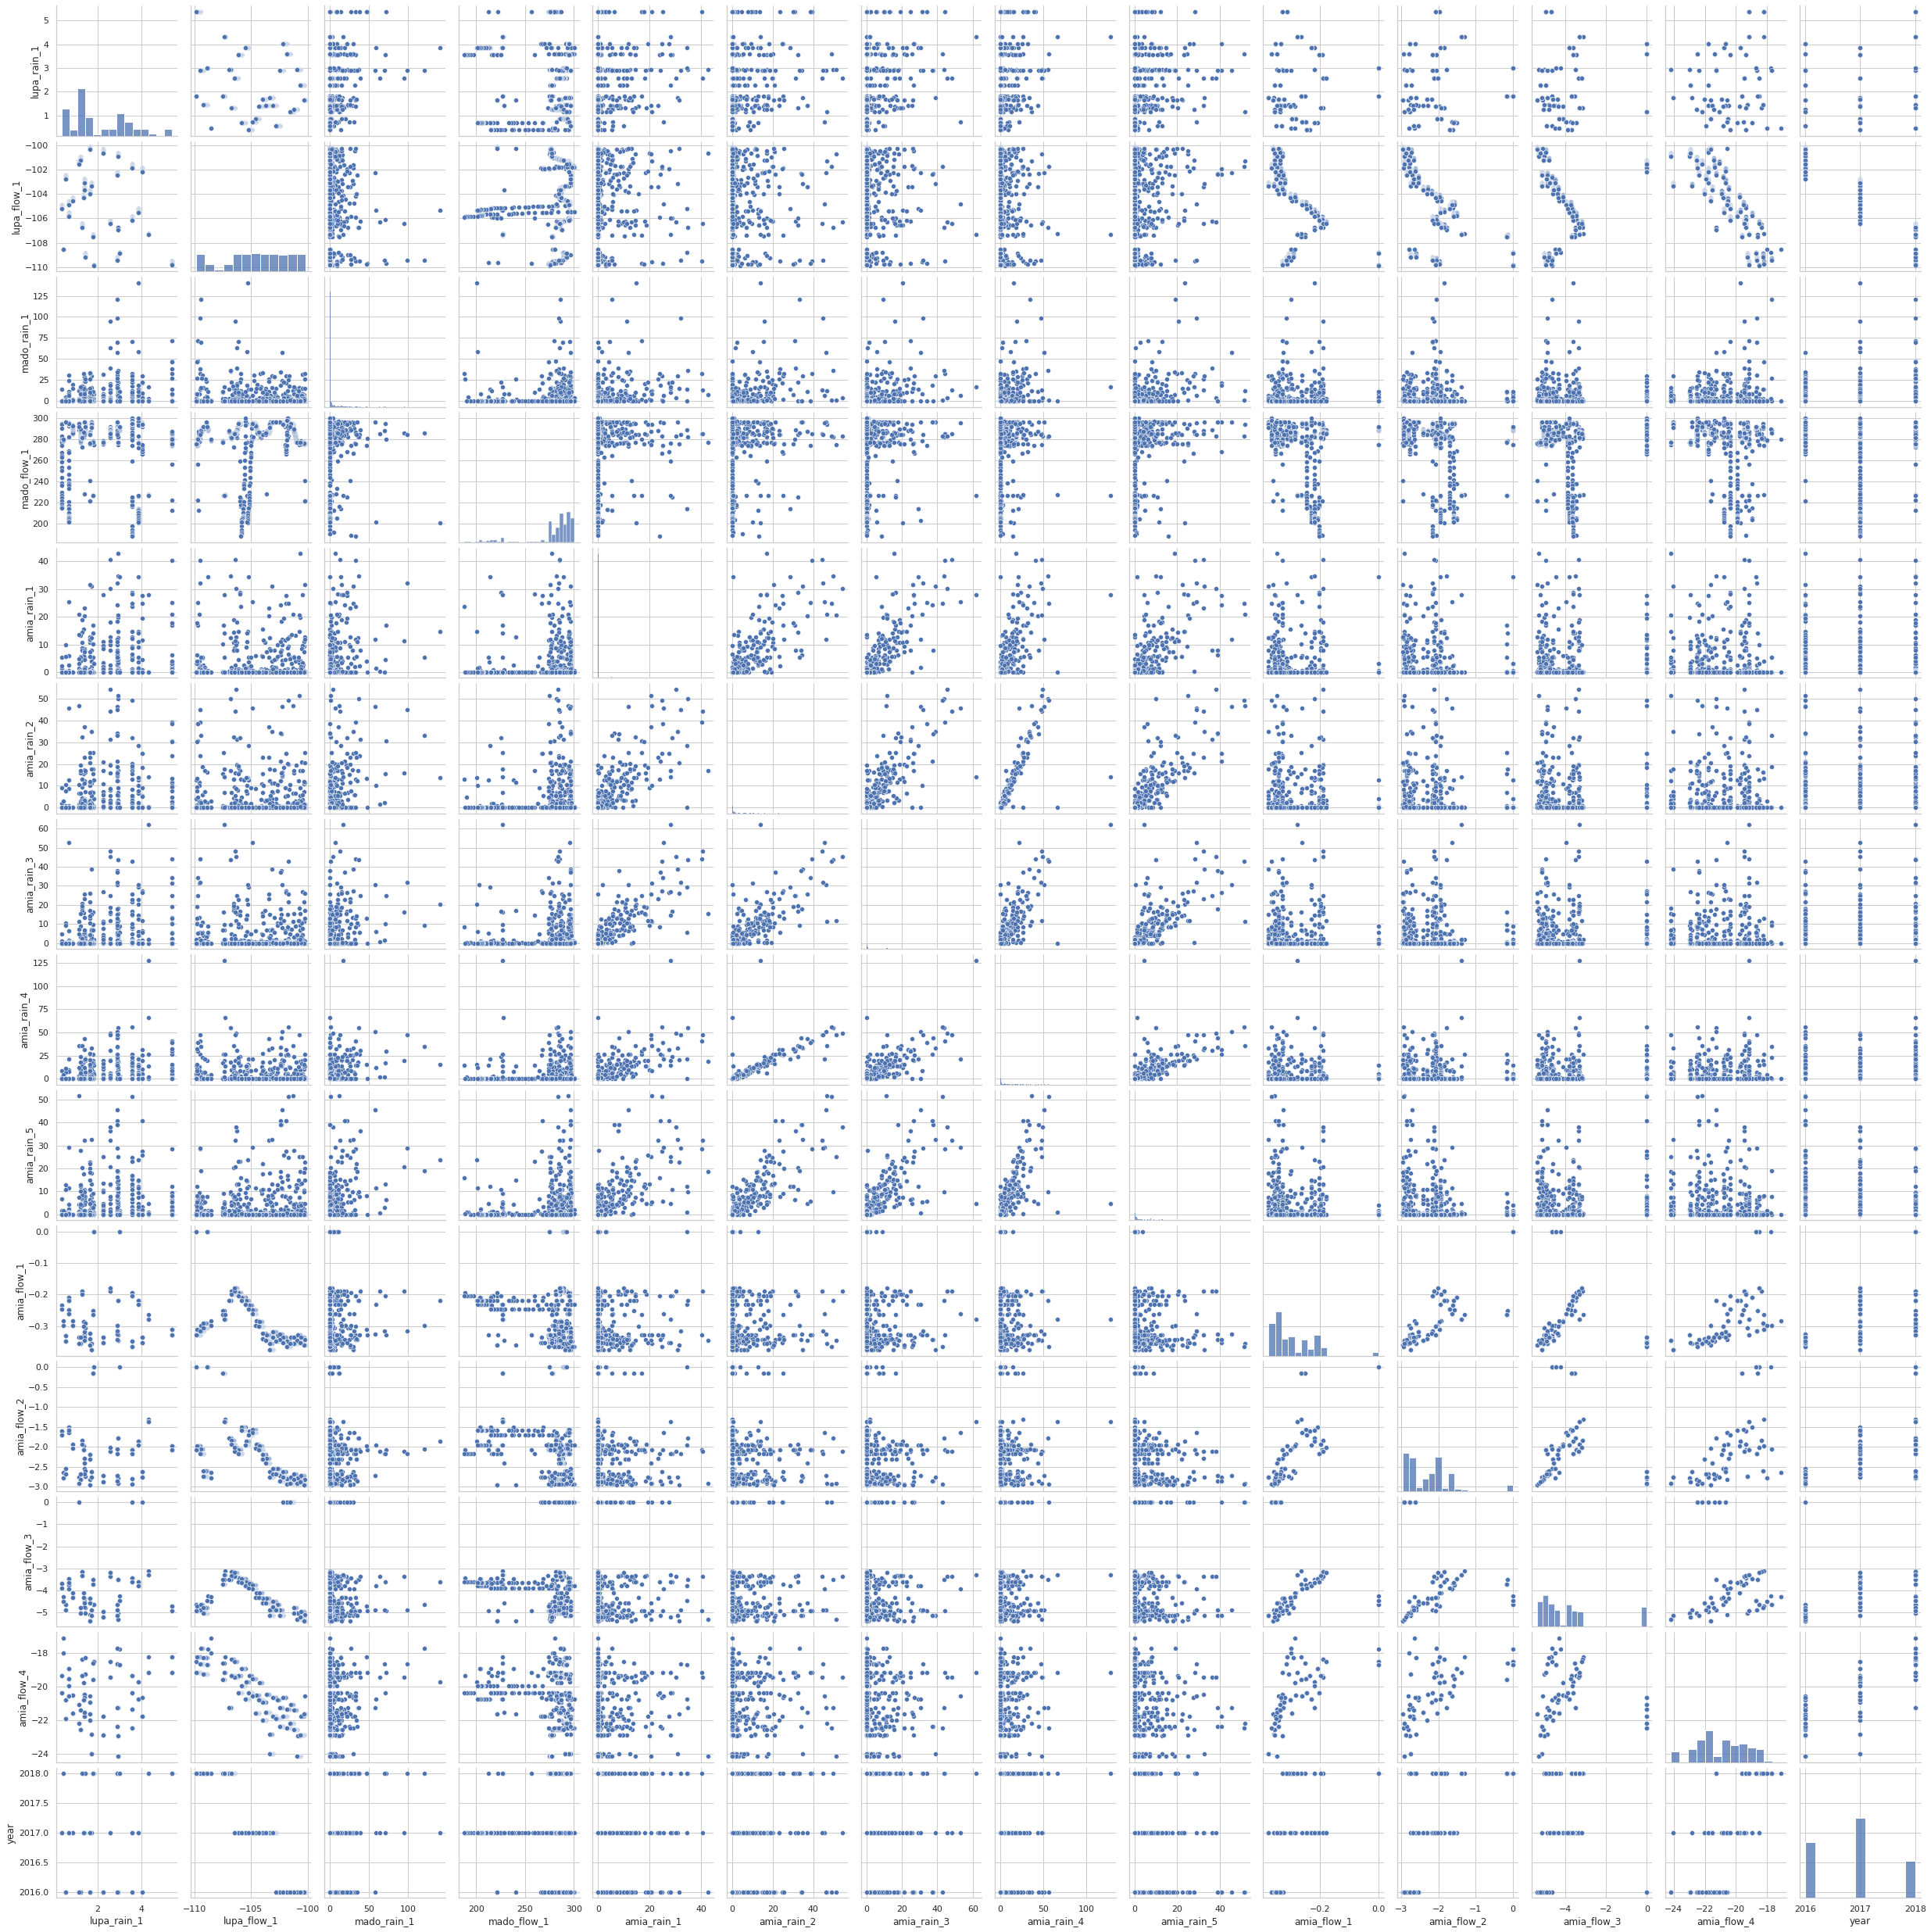

In [17]:
sns.set(style='whitegrid',context='notebook')
cols = waterdf.columns
sns.pairplot(waterdf_drna[cols],size=2.5)

###Measuaring correlation between rain and flow of each waterbody

####Lupa

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope: -0.425
Intercept: -103.528


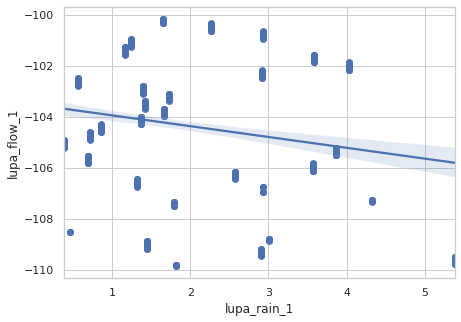

In [18]:
#This is about drawing regression line between dependant and indepedant variable in Lupa water resource

slt = LinearRegression()
X = waterdf_drna[['lupa_rain_1']].values
y = waterdf_drna['lupa_flow_1'].values
slt.fit(X,y)
fig=plt.figure(figsize=(7,5))
sns.regplot(X,y,slt)
plt.xlabel('lupa_rain_1')
plt.ylabel('lupa_flow_1')

print('slope: %.3f'% slt.coef_[0])
print('Intercept: %.3f' % slt.intercept_)

####Madonna

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope: -0.087
Intercept: 279.620


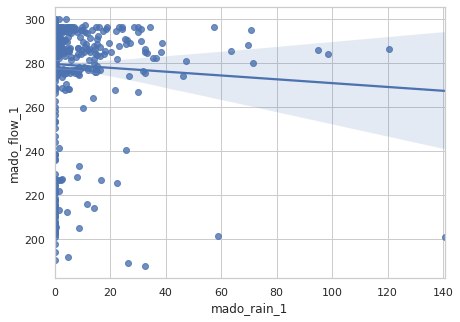

In [19]:
#This is about drawing regression line between dependant and indepedant variable in Madonna water resource

slt = LinearRegression()
X = waterdf_drna[['mado_rain_1']].values
y = waterdf_drna['mado_flow_1'].values
slt.fit(X,y)
fig=plt.figure(figsize=(7,5))
sns.regplot(X,y,slt)
plt.xlabel('mado_rain_1')
plt.ylabel('mado_flow_1')

print('slope: %.3f'% slt.coef_[0])
print('Intercept: %.3f' % slt.intercept_)

####Amiata

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope: -0.001
Intercept: -0.294


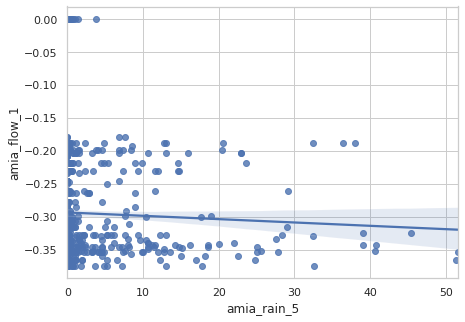

In [20]:
#This is about drawing regression line between dependant and indepedant variable in Amiata water resource
#based on previous sectin, we stick to amia_rain_5 source as an independant variable and amia_flow_1 as a dependant variable.
#other combination between rain and flow seem to not correlate linearly with each other. 

slt = LinearRegression()
X = waterdf_drna[['amia_rain_5']].values
y = waterdf_drna['amia_flow_1'].values
slt.fit(X,y)
fig=plt.figure(figsize=(7,5))
sns.regplot(X,y,slt)
plt.xlabel('amia_rain_5')
plt.ylabel('amia_flow_1')

print('slope: %.3f'% slt.coef_[0])
print('Intercept: %.3f' % slt.intercept_)

##with interpolating missing data

Here we try to interpolate missing values and then calculate correlation between data

In [21]:
waterdf=waterdf.interpolate(method='linear', limit_direction='forward', axis=0)

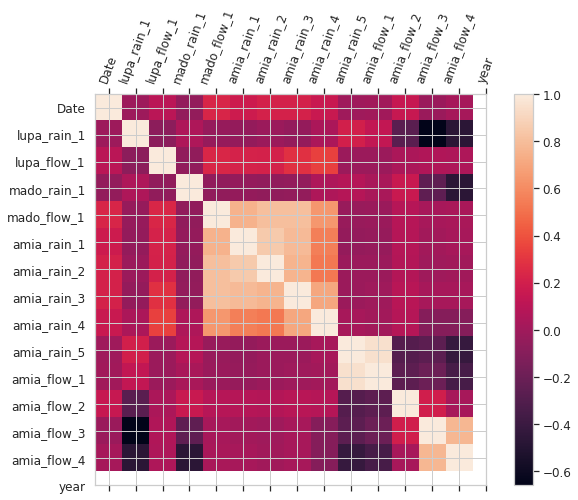

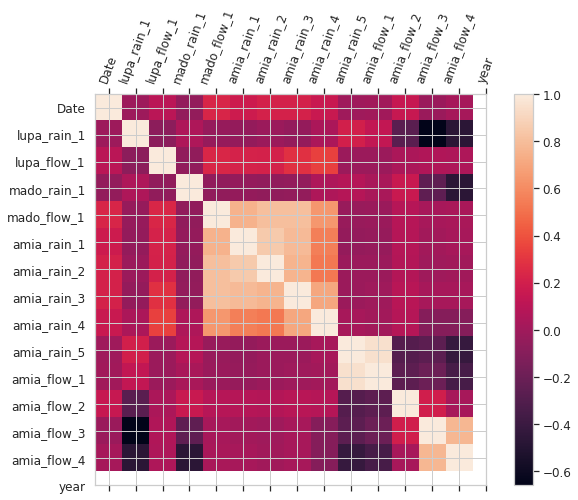

In [22]:
#plot correlation diagram

f = plt.figure(figsize=(10, 7))
plt.matshow(waterdf.corr(), fignum=f.number)
plt.xticks(range(waterdf.shape[1]), waterdf.columns, fontsize=12, rotation=70)
plt.yticks(range(waterdf.shape[1]), waterdf.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)


f = plt.figure(figsize=(10, 7))
plt.matshow(waterdf.corr(), fignum=f.number)
plt.xticks(range(waterdf.shape[1]), waterdf.columns, fontsize=12, rotation=70)
plt.yticks(range(waterdf.shape[1]), waterdf.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)

###More detailed correlation patterns

In [ ]:
sns.set(style='whitegrid',context='notebook')
cols = waterdf.columns
sns.pairplot(waterdf[cols],size=2.5)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


###Measuaring correlation between rain and flow of each waterbody

####Lupa

In [ ]:
#This is about drawing regression line between dependant and indepedant variable in Lupa water resource

slt = LinearRegression()
X = waterdf[['lupa_rain_1']].values
y = waterdf['lupa_flow_1'].values
slt.fit(X,y)
fig=plt.figure(figsize=(7,5))
sns.regplot(X,y,slt)
plt.xlabel('lupa_rain_1')
plt.ylabel('lupa_flow_1')

print('slope: %.3f'% slt.coef_[0])
print('Intercept: %.3f' % slt.intercept_)

####Amiata

In [ ]:
#This is about drawing regression line between dependant and indepedant variable in Amiata water resource
#based on previous sectin, we stick to amia_rain_5 source as an independant variable and amia_flow_1 as a dependant variable.
#other combination between rain and flow seem to not correlate linearly with each other. 

slt = LinearRegression()
X = waterdf[['amia_rain_5']].values
y = waterdf['amia_flow_1'].values
slt.fit(X,y)
fig=plt.figure(figsize=(7,5))
sns.regplot(X,y,slt)
plt.xlabel('amia_rain_5')
plt.ylabel('amia_flow_1')

print('slope: %.3f'% slt.coef_[0])
print('Intercept: %.3f' % slt.intercept_)

# Measurement locations.

In [ ]:
#First we define a dictionary of geographic locations of sites then point them out on the map

locations = {}
locations['mado_rain_1'] = {'lat' : 41.669624, 'lon' : 13.850011 }
locations['amia_rain_2'] = {'lat' : 42.8809724, 'lon' : 11.6724203 }
locations['amia_rain_3'] = {'lat' : 42.854, 'lon' : 11.556 }
locations['amia_rain_4']  = {'lat' :   42.883, 'lon' : 11.662  }
locations['amia_rain_5'] = {'lat' : 42.8908958, 'lon' : 11.6264863 }
locations['amia_rain_1'] = {'lat' : 42.8932352, 'lon' : 11.5383804 }
locations['lupa_rain_1'] = {'lat' : 42.6537515, 'lon' : 12.43981163 }

m = folium.Map(location=[42.4, 12.4], tiles='cartodbpositron',zoom_start=9)
geolocator = Nominatim(user_agent='myapplication')
for i in locations.keys():
    folium.Marker([locations[i]['lat'], locations[i]['lon']], popup=i, icon=folium.Icon()).add_to(m)

m